# Goals of this notebook: 

- Learn to read in hdf5 files
- Learn how to work with dictionaries 
- Make plots to show different dark matter subhalo properties


---

## Imports and defining plotting parameters

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from harvesting_tools.harvest_paths import SetupPaths

path_to_harvest = "/xdisk/gbesla/katiechambe/harvest"
paths = SetupPaths(path_to_harvest)

In [2]:
# initialize matplotlib params and update
plt.show();
plt.rcParams.update({'font.size':18,"xtick.direction":"in","ytick.direction":"in", 
                     "xtick.top":True, "ytick.right":True,"text.usetex":False,
                     "xtick.labelsize":18,"ytick.labelsize":18})

# Reading data files

The data files contained in this repository are hdf5 files, which allow you to store a lot of metadata about your data, and create highly structured data files.
First, let's read in pair data for high-mass major pairs at z=0.


In [3]:
#! IMPORTANT: make sure to close hdf5 file after using to prevent file corruption

pairs = h5py.File(f"{paths.path_pairs}highmass_major_99.hdf5", "r")

In [4]:
# take a look at the names different subfolders of data in this file
pairs.keys()

<KeysViewHDF5 ['Comoving Separation', 'Group ID', 'Group Mass', 'Group Nsubs', 'Group Radius', 'Header', 'Realization', 'RelVel', 'Separation', 'Stellar Mass Ratio', 'Sub1 BHMass', 'Sub1 BHMdot', 'Sub1 GasMetallicity', 'Sub1 ID', 'Sub1 Mass', 'Sub1 MassType', 'Sub1 Pos', 'Sub1 SFR', 'Sub1 SFRinRad', 'Sub1 Stellar Mass', 'Sub1 Vel', 'Sub2 BHMass', 'Sub2 BHMdot', 'Sub2 GasMetallicity', 'Sub2 ID', 'Sub2 Mass', 'Sub2 MassType', 'Sub2 Pos', 'Sub2 SFR', 'Sub2 SFRinRad', 'Sub2 Stellar Mass', 'Sub2 Vel', 'TripleFlag']>

We can see this file contains a variety of data about subhalo pairs, including the masses, subhalo IDs, velocities, and positions of all of the subhalos. 
Then, any of these keys can be used in the following way to look at the data:

```pairs[keyname]```

--

If we want to assign one of these subfolders to a numpy array, we can do the following:

In [5]:
submass1 = np.array(pairs["Sub1 Mass"])

In [6]:
# let's print the masses of the first ten subhalos in the data file
print(submass1[0:10])

[449.55104651 514.48262262 566.20185341 619.88936436 567.80229179
 504.84737535 544.3904799  218.69047856 465.3476099  463.25179022]


--



Okay, so the first subhalo has a mass of 449... what? kg? Msun? 
You can find more information about the units of each data type in the following way:

In [7]:
pairs["Sub1 Mass"].attrs["Sub1 Mass"]

'Subhalo mass at current snapshot -- 1e10 Msun'

This shows that the 1st subhalo in the file has a mass of 449 * 1e10 Msun, or 4.49e12 Msun! 

--

Other data about the data file in general can be found in the Header of the data file.

In [8]:
pairs["Header"].attrs.keys()

<KeysViewHDF5 ['Details', 'Redshift', 'Scale', 'Simulation', 'Snapshot']>

In [9]:
print(pairs['Header'].attrs['Details'])
print(f"This data file contains informations from the {pairs['Header'].attrs['Simulation']} Simulation")
print("The redshift corresponding to this snapshot is: ",pairs['Header'].attrs['Redshift'])


high mass major pairs at z=0.0
This data file contains informations from the TNG100-1 Simulation
The redshift corresponding to this snapshot is:  2.220446049250313e-16


--

Finally, we MUST close the hdf5 file before . In the next section, I'll show you how to read in the data in a "safer" way so you won't forget this step in the future. 

In [10]:
pairs.close()

___ 

# Plotting the mass of primaries and secondaries

Here, we can start by reading in the data from the z=0 file and assigning each "subfolder" (which you can think about as a column of data in excel) to an array in a dictionary~~

In [11]:
# first, initialize a dictionary
pairs = {} # curly brackets for dictionaries!


--

Then, loop through each key (aka data column) and assign the associated data to it's key in the dictionary and then immediately close the hdf5 file

In [12]:
f = h5py.File(f"{paths.path_pairs}highmass_major_99.hdf5", "r")
for key, val in f.items():
    if key == "Header":
        # we are doing to ignore the header data for now~ 
        continue 
    
    print(f"Adding key to dictionary: {key}")
    pairs[key] = np.array(val)
    
f.close()  # <---- the most important line in this cell to include!! 

Adding key to dictionary: Comoving Separation
Adding key to dictionary: Group ID
Adding key to dictionary: Group Mass
Adding key to dictionary: Group Nsubs
Adding key to dictionary: Group Radius
Adding key to dictionary: Realization
Adding key to dictionary: RelVel
Adding key to dictionary: Separation
Adding key to dictionary: Stellar Mass Ratio
Adding key to dictionary: Sub1 BHMass
Adding key to dictionary: Sub1 BHMdot
Adding key to dictionary: Sub1 GasMetallicity
Adding key to dictionary: Sub1 ID
Adding key to dictionary: Sub1 Mass
Adding key to dictionary: Sub1 MassType
Adding key to dictionary: Sub1 Pos
Adding key to dictionary: Sub1 SFR
Adding key to dictionary: Sub1 SFRinRad
Adding key to dictionary: Sub1 Stellar Mass
Adding key to dictionary: Sub1 Vel
Adding key to dictionary: Sub2 BHMass
Adding key to dictionary: Sub2 BHMdot
Adding key to dictionary: Sub2 GasMetallicity
Adding key to dictionary: Sub2 ID
Adding key to dictionary: Sub2 Mass
Adding key to dictionary: Sub2 MassType

Note!!! 
This new data structure (the 'pairs' dictionary) does not include information about the units of any of it's contents. To see the units of any of the columns, you would need to read in the data file again, then close it after.

--

Now, let's make a plot of the masses of the primaries (Subhalo1 or Sub1) and secondaries (Sub2) 

In [13]:
mass1 = pairs["Sub1 Mass"]
mass2 = pairs["Sub2 Mass"]

print(len(mass1),len(mass2))
# the length of the arrays should be equal, meaning that each primary has a secondary

389 389


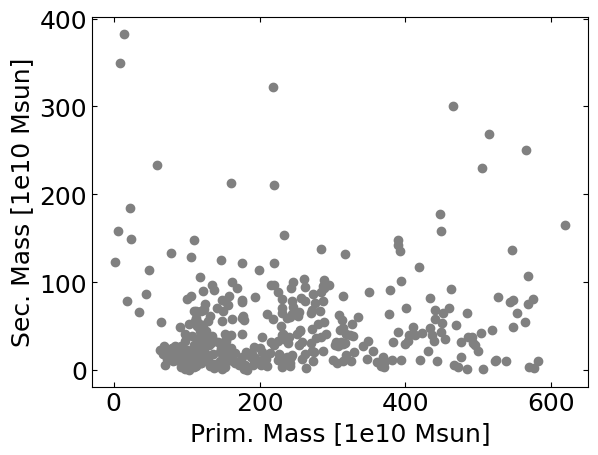

In [14]:
plt.scatter(mass1, mass2, color='grey')
plt.xlabel("Prim. Mass [1e10 Msun]")
plt.ylabel("Sec. Mass [1e10 Msun]")
plt.show()

-- 


Now, let's compare the major and minor high-mass pairs. We will need to load in the minor pairs at z=0.


In [15]:
# initialize minor dictionary and add data
minor = {}
f = h5py.File(f"{paths.path_pairs}highmass_minor_99.hdf5", "r")
for key, val in f.items():
    if key == "Header":
        # we are doing to ignore the header data for now~ 
        continue 
    
    print(f"Adding key to dictionary: {key}")
    minor[key] = np.array(val)
    
f.close()  # <---- the most important line in this cell to include!! 

Adding key to dictionary: Comoving Separation
Adding key to dictionary: Group ID
Adding key to dictionary: Group Mass
Adding key to dictionary: Group Nsubs
Adding key to dictionary: Group Radius
Adding key to dictionary: Realization
Adding key to dictionary: RelVel
Adding key to dictionary: Separation
Adding key to dictionary: Stellar Mass Ratio
Adding key to dictionary: Sub1 BHMass
Adding key to dictionary: Sub1 BHMdot
Adding key to dictionary: Sub1 GasMetallicity
Adding key to dictionary: Sub1 ID
Adding key to dictionary: Sub1 Mass
Adding key to dictionary: Sub1 MassType
Adding key to dictionary: Sub1 Pos
Adding key to dictionary: Sub1 SFR
Adding key to dictionary: Sub1 SFRinRad
Adding key to dictionary: Sub1 Stellar Mass
Adding key to dictionary: Sub1 Vel
Adding key to dictionary: Sub2 BHMass
Adding key to dictionary: Sub2 BHMdot
Adding key to dictionary: Sub2 GasMetallicity
Adding key to dictionary: Sub2 ID
Adding key to dictionary: Sub2 Mass
Adding key to dictionary: Sub2 MassType

In [16]:
mass1_minor = minor["Sub1 Mass"]
mass2_minor = minor["Sub2 Mass"]

print(len(mass1_minor),len(mass2_minor))
# the length of the arrays should be equal, meaning that each primary has a secondary

277 277


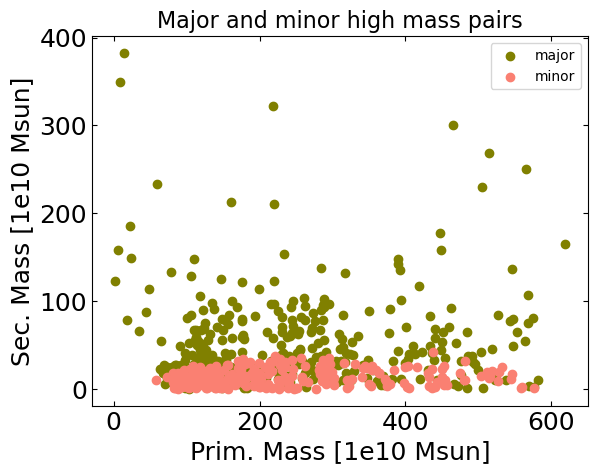

In [17]:
plt.scatter(mass1, mass2, color='olive', label='major')
plt.scatter(mass1_minor, mass2_minor, color='salmon', label='minor')
plt.xlabel("Prim. Mass [1e10 Msun]")
plt.ylabel("Sec. Mass [1e10 Msun]")
plt.title("Major and minor high mass pairs", fontsize=16)
plt.legend(fontsize=10)
plt.show()

As expected, the minor pairs have much lower secondary masses, since the mass ratio must be smaller!

<font color='grey'> *author:* Dr. Katie Chamberlain  -- May 2024